# Number Classification Application

![Task.png](https://i.postimg.cc/7hSp2h81/Task.png)

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
X = digits.data
y = digits.target
print('Shape of Input data is = ',X.shape)

Shape of Input data is =  (1797, 64)


# Normalization

In [7]:
X = X/X.max()

In [11]:
# Thresholding 
X[X<0.5] = 0.0# value < 0.5 -> 0
X[X>=0.5]= 1.0# value > 0.5 -> 1

There are **1,797** images and each image is 8 x 8 and that is reshaped into 1-D

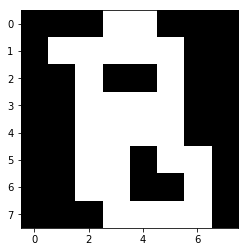

In [13]:
img = X[500:501].reshape((8,8))
plt.imshow(img,cmap='gray')

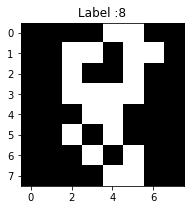

In [14]:
label=630
plt.figure(figsize=(3,3))
plt.imshow(X[label:label+1].reshape((8,8,)),cmap='gray')
plt.title('Label :%s'%(y[label]))
plt.show()


# Split Data
- train data -> 70%
- test data -> 30 %


In [15]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


((1257, 64), (540, 64), (1257,), (540,))

# TRAIN MODEL

In [16]:
# CODE HERE
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
# training model
model.fit(x_train,y_train)
print('Model trained sucessfully!!!')

Model trained sucessfully!!!


# Classification report 

In [17]:
from pandas_ml import ConfusionMatrix

In [18]:
y_pred = model.predict(x_test)

In [19]:
cm = ConfusionMatrix(y_test,y_pred)
cm

Predicted   0   1   2   3   4   5   6   7   8   9  __all__
Actual                                                    
0          56   0   0   0   0   0   0   0   0   0       56
1           0  63   0   0   0   0   0   0   1   0       64
2           0   1  54   0   0   0   0   0   0   0       55
3           0   0   0  45   0   1   0   1   0   1       48
4           0   2   0   1  47   0   0   2   0   0       52
5           0   0   0   1   1  47   0   0   0   0       49
6           1   0   0   0   0   0  48   0   0   0       49
7           0   0   0   0   0   1   0  55   0   0       56
8           0   3   1   2   0   1   0   0  45   0       52
9           1   1   0   0   0   4   0   1   0  52       59
__all__    58  70  55  49  48  54  48  59  46  53      540

In [20]:
cm.stats_overall

C:\Users\srikanth\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.9481481481481482),
             ('95% CI', (0.9259288847399091, 0.9652718811797594)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.0),
             ('Kappa', 0.9423292572221926),
             ("Mcnemar's Test P-Value", 'ToDo')])

In [21]:
from sklearn.metrics import classification_report

In [22]:
cr = classification_report(y_test,y_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.97      1.00      0.98        56
          1       0.90      0.98      0.94        64
          2       0.98      0.98      0.98        55
          3       0.92      0.94      0.93        48
          4       0.98      0.90      0.94        52
          5       0.87      0.96      0.91        49
          6       1.00      0.98      0.99        49
          7       0.93      0.98      0.96        56
          8       0.98      0.87      0.92        52
          9       0.98      0.88      0.93        59

avg / total       0.95      0.95      0.95       540



# SAVE MODEL

In [23]:
# CODE HERE
from sklearn.externals import joblib

In [24]:
joblib.dump(model,'task_number_norm.pkl')

['task_number_norm.pkl']

In [25]:
X[0:1]

array([[0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
        0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.]])

# TEST WITH REAL IMAGE

In [ ]:
# CODE HERE